In [5]:
import ROOT
import sys
import os
import numpy as np
from ROOT import TCanvas, TColor, TGaxis, TH1F, TPad
from ROOT import kBlack, kBlue, kRed, kViolet,kPink


In [6]:
# Pixel from CMSSW_12
# Importing file with CMSSW_12_4_14 output for geometry2017Plan1
infile_12_pixel = ROOT.TFile (" /afs/cern.ch/user/s/sraj/sraj/Work_/CUA_20--/Project_Material_Validation_V1/matbdg_Pixel_Extended2017Plan1.root"," READ ")
infile_12_pixel.ls();

TFile**		/afs/cern.ch/user/s/sraj/sraj/Work_/CUA_20--/Project_Material_Validation_V1/matbdg_Pixel_Extended2017Plan1.root	
 TFile*		/afs/cern.ch/user/s/sraj/sraj/Work_/CUA_20--/Project_Material_Validation_V1/matbdg_Pixel_Extended2017Plan1.root	
  KEY: TH1F	11;1	Eta 
  KEY: TH1F	21;1	Phi 
  KEY: TH1F	41;1	R 
  KEY: TH1F	111;1	Eta [Support]
  KEY: TH1F	121;1	Phi [Support]
  KEY: TH1F	141;1	R [Support]
  KEY: TH1F	211;1	Eta [Sensitive]
  KEY: TH1F	221;1	Phi [Sensitive]
  KEY: TH1F	241;1	R [Sensitive]
  KEY: TH1F	311;1	Eta [Cables]
  KEY: TH1F	321;1	Phi [Cables]
  KEY: TH1F	341;1	R [Cables]
  KEY: TH1F	411;1	Eta [Cooling]
  KEY: TH1F	421;1	Phi [Cooling]
  KEY: TH1F	441;1	R [Cooling]
  KEY: TH1F	511;1	Eta [Electronics]
  KEY: TH1F	521;1	Phi [Electronics]
  KEY: TH1F	541;1	R [Electronics]
  KEY: TH1F	611;1	Eta [Other]
  KEY: TH1F	621;1	Phi [Other]
  KEY: TH1F	641;1	R [Other]
  KEY: TH1F	711;1	Eta [Air]
  KEY: TH1F	721;1	Phi [Air]
  KEY: TH1F	741;1	R [Air]
  KEY: TH1F	1011;1	Eta 
  KEY: TH1F	1

In [7]:
# Importing file with CMSSW_12_4_14 output for geometry2017Plan1
infile_10_pixel = ROOT.TFile ("/afs/cern.ch/user/s/sraj/GeometryTask/CMSSW_10_6_0/src/Validation/Geometry/test/matbdg_Pixel_Extended2017Plan1.root"," READ ")
infile_10_pixel.ls();

TFile**		/afs/cern.ch/user/s/sraj/GeometryTask/CMSSW_10_6_0/src/Validation/Geometry/test/matbdg_Pixel_Extended2017Plan1.root	
 TFile*		/afs/cern.ch/user/s/sraj/GeometryTask/CMSSW_10_6_0/src/Validation/Geometry/test/matbdg_Pixel_Extended2017Plan1.root	
  KEY: TH1F	11;1	Eta 
  KEY: TH1F	21;1	Phi 
  KEY: TH1F	41;1	R 
  KEY: TH1F	111;1	Eta [Support]
  KEY: TH1F	121;1	Phi [Support]
  KEY: TH1F	141;1	R [Support]
  KEY: TH1F	211;1	Eta [Sensitive]
  KEY: TH1F	221;1	Phi [Sensitive]
  KEY: TH1F	241;1	R [Sensitive]
  KEY: TH1F	311;1	Eta [Cables]
  KEY: TH1F	321;1	Phi [Cables]
  KEY: TH1F	341;1	R [Cables]
  KEY: TH1F	411;1	Eta [Cooling]
  KEY: TH1F	421;1	Phi [Cooling]
  KEY: TH1F	441;1	R [Cooling]
  KEY: TH1F	511;1	Eta [Electronics]
  KEY: TH1F	521;1	Phi [Electronics]
  KEY: TH1F	541;1	R [Electronics]
  KEY: TH1F	611;1	Eta [Other]
  KEY: TH1F	621;1	Phi [Other]
  KEY: TH1F	641;1	R [Other]
  KEY: TH1F	711;1	Eta [Air]
  KEY: TH1F	721;1	Phi [Air]
  KEY: TH1F	741;1	R [Air]
  KEY: TH1F	1011;1	Eta 
  KEY

Warning in <TFile::Append>: Replacing existing TH1: totalMC (Potential memory leak).
Warning in <TH1::TH1>: nbins is <=0 - set to nbins = 1
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale
Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale


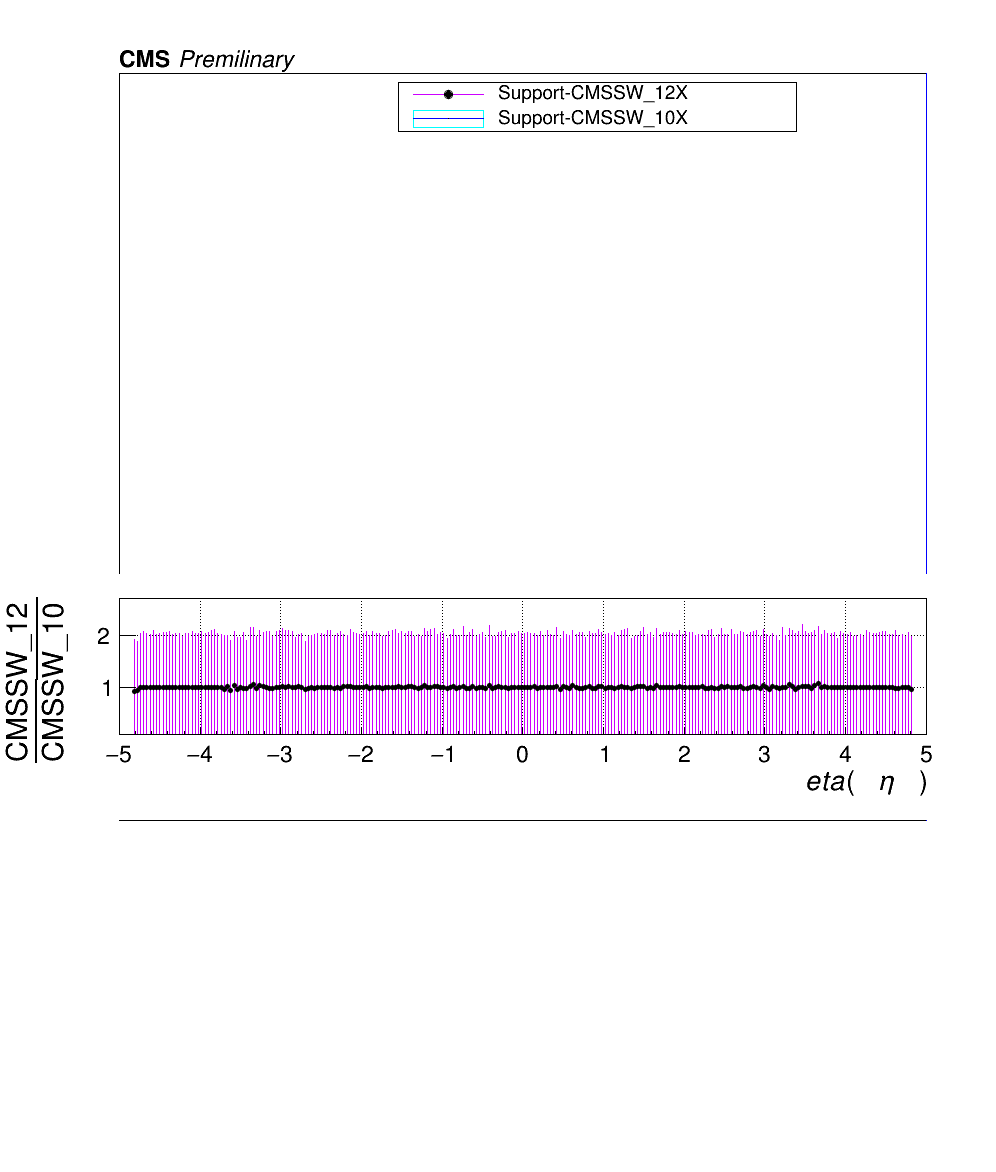

In [9]:
hist_12_cooling = infile_12_pixel.Get("1010")
hist_10_cooling = infile_10_pixel.Get("1010")


hist_12_cooling.SetMarkerStyle(20)
hist_12_cooling.SetMarkerSize(1)
hist_12_cooling.SetMarkerColor(kBlack)
hist_12_cooling.SetLineWidth(1)
hist_12_cooling.SetLineColor(kViolet)
# hist_12_cooling.GetYaxis().SetRangeUser(0.001,1)


totalMC= ROOT.TH1F("totalMC", "Events;DNN score;",-5,5,250)
totalMC.Add(hist_10_cooling)
totalMCYield=totalMC.Integral()
DataYield= hist_12_cooling.Integral()
DataMC_scaleF=DataYield/totalMCYield  


hist_10_cooling.Scale(DataMC_scaleF)

hist_10_cooling.SetFillColor(7)
hist_10_cooling.SetLineColor(kBlue);
# hist_10_cooling.GetYaxis().SetRangeUser(0.001, 1)

stack_I = ROOT.THStack("","")
stack_I.Add(hist_10_cooling)



hRatio = hist_12_cooling.Clone("hRatio");
hRatio.Reset();
hRatio.Add(hist_12_cooling);
hRatio.Divide(hist_10_cooling);
hRatio.SetStats(0);
hRatio.SetMarkerStyle(20);
hRatio.SetMarkerSize(1);
hRatio.SetTitle("");


hRatio.GetYaxis().SetRangeUser(0.1,2.7);
hRatio.GetYaxis().SetTitleOffset(0.4);
hRatio.GetYaxis().SetTitleSize(0.13);
hRatio.GetXaxis().SetTitleSize(0.12);
hRatio.GetXaxis().SetLabelSize(0.10);
hRatio.GetYaxis().SetLabelSize(0.10);
hRatio.GetYaxis().SetTitle("#frac{CMSSW_12}{CMSSW_10}");
hRatio.GetXaxis().SetTitle("eta($\eta$)");
hRatio.GetXaxis().SetLabelOffset(0.035);
hRatio.GetYaxis().SetLabelOffset(0.01);
hRatio.GetYaxis().SetNdivisions(5);
hRatio.SetMarkerStyle(19);
hRatio.SetMarkerSize(0.5);
hRatio.SetMarkerColor(kBlack);
# hRatio.Fit("pol1")   #It shows the fit 

c1 = ROOT.TCanvas('c1',"",1000,1200)
pad1 = ROOT.TPad("pad1","pad1",0,0.3,1.0,1.0);
pad1.SetTopMargin(0.090);
pad1.SetBottomMargin(0);
pad1.SetLeftMargin(0.120);
pad1.SetRightMargin(0.070);
pad1.SetLogy();
pad1.SetTickx();
pad1.SetTicky();
pad1.Draw();
pad1.cd();

tex1 = ROOT.TLatex(0.12, 0.94, "#bf{CMS} #it{Premilinary}")
tex1.SetNDC()
tex1.SetTextAlign(13)
tex1.SetTextFont(42)
tex1.SetTextSize(0.03)
tex1.SetLineWidth(2)

tex2 = ROOT.TLatex(0.72, 0.94, "137 fb^{-1} (13 TeV)")
tex2.SetNDC()
tex2.SetTextAlign(13)
tex2.SetTextFont(42)
tex2.SetTextSize(0.03)
tex2.SetLineWidth(2)

stack_I.Draw("hist")
stack_I.GetYaxis().SetTitle("X/X_0");
# stack_I.GetYaxis().SetRangeUser(0.001, 1)
stack_I.SetMaximum(0.5)
stack_I.SetMinimum(0)


hist_12_cooling.Draw("E0 x0 SAME")

# Legend drawing
legend = ROOT.TLegend()
legend = ROOT.TLegend(0.40,0.84,0.80,0.90)
legend.AddEntry(hist_12_cooling, "Support-CMSSW_12X")
legend.AddEntry(hist_10_cooling, "Support-CMSSW_10X")

# canvas.SetLogy()
legend.Draw()
# canvas.Draw()

tex1.Draw()



pad2 = TPad("pad2","pad2",0,0,1,0.3);
pad2.SetTopMargin(0.1);
pad2.SetLeftMargin(0.120);
pad2.SetRightMargin(0.070);
pad2.SetBottomMargin(0.35);
pad2.SetGridy();
pad2.SetGridx();
pad2.Draw();
pad2.cd();

hRatio.Draw("E0 x0");
c1.Draw()
# c1.SaveAs("/afs/cern.ch/user/s/sraj/sraj/www/CUA/Comparision/Support_comaprision_CMSSW_10&12.pdf")
# c1.SaveAs("/afs/cern.ch/user/s/sraj/sraj/www/CUA/Comparision/Support_comaprision_CMSSW_10&12.png")